In [3]:
%matplotlib inline

In [1]:
from jupyterworkflow.data import get_fremont_data

data = get_fremont_data()

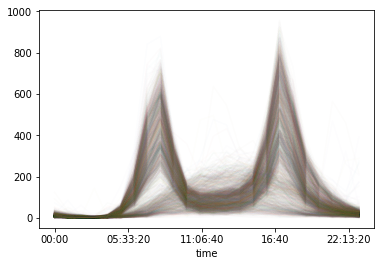

In [2]:
pivoted = data.pivot_table(
    "Total", index = data.index.time, columns=data.index.date)

pivoted.plot(legend=False, alpha=0.01)

In [4]:
import numpy as np
np.unique(data.index.time)

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(3, 0), datetime.time(4, 0), datetime.time(5, 0),
       datetime.time(6, 0), datetime.time(7, 0), datetime.time(8, 0),
       datetime.time(9, 0), datetime.time(10, 0), datetime.time(11, 0),
       datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(15, 0), datetime.time(16, 0), datetime.time(17, 0),
       datetime.time(18, 0), datetime.time(19, 0), datetime.time(20, 0),
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

In [5]:
assert len(np.unique(data.index.time)) == 24